# Logical Operations

We will see how logical operations can be applied to images and how they can be used forr binary masks.
Logical operations are often used with binary masks to process slective portions of an image. In this notebook we will cover:
+ Introduction to logical operators
+ Bitwise operations on images: AND, NOT, OR, XOR
+ Logo manipulation example

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

The four functions in OpenCV that allow us to perform these operations on images:
1. bitwise_and()
2. bitwise_not()
3. bitwise_or()
4. bitwise_xor()

The syntax is the same for each of this. The first two required arguments are two images of the same size

(200, 499)


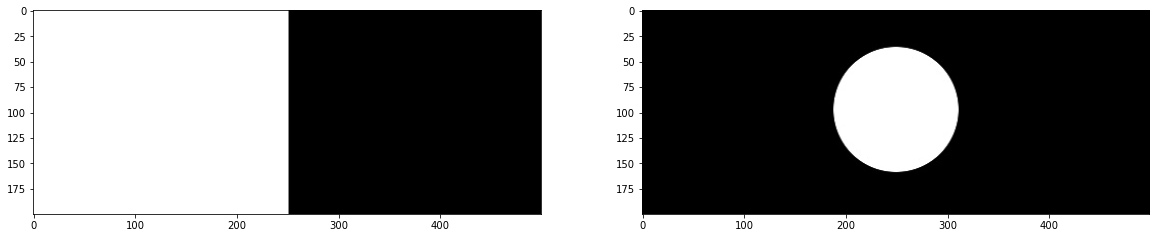

In [2]:
img_rec = cv2.imread('rectangle.jpg', cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread('circle.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 5))
plt.subplot(121); plt.imshow(img_rec)
plt.subplot(122); plt.imshow(img_cir)
print(img_rec.shape)

# Bitwise AND operator

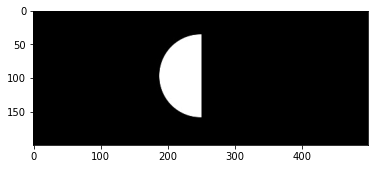

In [3]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result);

# Bitwise OR operator

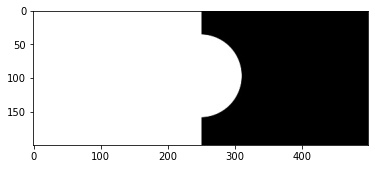

In [4]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result);

# Bitwise XOR operator

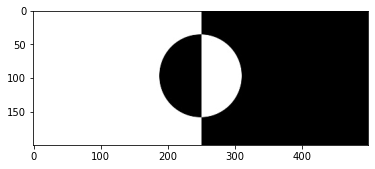

In [5]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result);

# 2. Example Application: Logo Manipulation

(500, 500, 3)


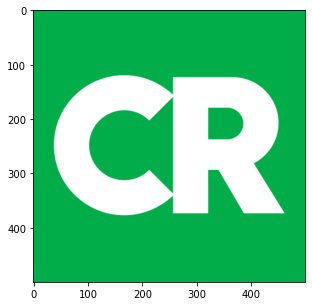

In [6]:
# Read the image of color CR logo (foreground).
img_logo = cv2.imread('CR_Logo.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_logo.shape)
logo_w = img_logo.shape[0]
logo_h = img_logo.shape[1]

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_logo[:, :, ::-1]);

In [7]:
# Read the image of color checkboard (background).
img_background = cv2.imread('checkerboard_color.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_background.shape)

(900, 900, 3)


(500, 500, 3)


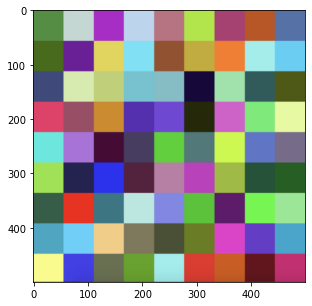

In [8]:
# RESIZE THE BACKGROUND IMAGE AND DISPLAY IT.
# Set the dimension of the background image to be the same as the logo.
dim = (logo_w, logo_h)

# Resize the background image to the same size as logo image.
img_background = cv2.resize(img_background, dim, interpolation=cv2.INTER_AREA)

# Print the image shape to confirm it's the same size as the logo.
print(img_background.shape)

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_background[:, :, ::-1]);

### Create a mask from the logo image

(500, 500)


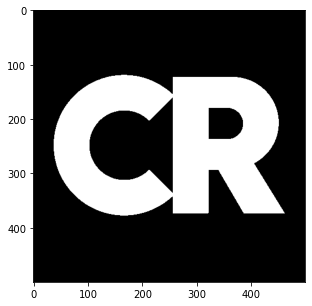

In [9]:
# Convert the image to grayscale.
img_logo_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)

# Apply global thresholding to create a binary mask of the logo.
retval, img_logo_mask = cv2.threshold(img_logo_gray, 127, 255, cv2.THRESH_BINARY)

# Print the image shape.
print(img_logo_mask.shape);

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_logo_mask);

### Apply the mask to the background image

(500, 500, 3)


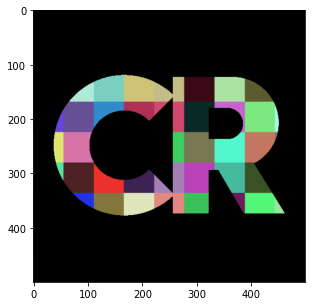

In [10]:
# Create colorful checkerboard background "behind" the logo lettering.
img_background = cv2.bitwise_and(img_background, img_background, mask=img_logo_mask)

# Print the image shape.
print(img_background.shape);

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_background);

### Invert the mask

(500, 500)


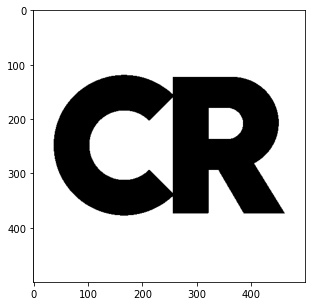

In [13]:
# Create an inverse mask.
img_logo_mask_inv = cv2.bitwise_not(img_logo_mask)

# Print the image shape.
print(img_logo_mask_inv.shape)

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_logo_mask_inv);

### Isolate the foreground of the logo

(500, 500, 3)


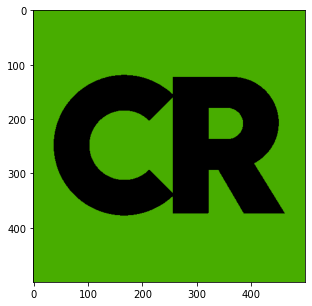

In [20]:
# Isolate the foreground using the inverse mask.
img_foreground = cv2.bitwise_and(img_logo, img_logo, mask=img_logo_mask_inv)

# Print the image shape.
print(img_foreground.shape)

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_foreground);

### Final result: Add the Foreground and Background

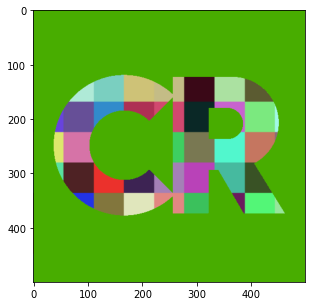

In [21]:
# Add the two previous results to obtain the final result.
result = cv2.add(img_background, img_foreground)

# Display the image and save the result to the file system.
plt.figure(figsize=(5, 5))
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1]);